In [74]:
import pandas as pd
from  matplotlib import pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
df = df.drop(['id' , 'Unnamed: 32' ] , axis=1)
df.shape


(569, 31)

In [77]:
df.duplicated().sum()

0

In [78]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
df.iloc[:, 1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [80]:
X = df.drop(['diagnosis'],axis=1)
Y = df['diagnosis']
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , random_state=25)

In [81]:
X_train.shape

(455, 30)

In [82]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [83]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [84]:
X_train

array([[ 3.67363478,  0.61144803,  3.66100904, ...,  2.34437188,
        -0.09611405, -0.17452236],
       [-1.32911335, -1.64698566, -1.31886818, ..., -0.8324528 ,
        -0.74330911, -0.35457983],
       [-0.96314126, -2.30080581, -0.97408857, ..., -1.08225493,
        -1.31717664, -0.39770039],
       ...,
       [-0.94055039, -0.88539296, -0.90701401, ..., -0.56496149,
        -0.53448509,  1.4092841 ],
       [-1.45957562, -0.09985081, -1.32991094, ..., -0.02905594,
         0.34863329,  1.26360654],
       [ 0.55044702,  0.53241483,  0.5567656 , ...,  0.22782186,
         0.89858967, -0.44431721]])

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25) #default value is n_neighbors=5

In [86]:
knn.fit(X_train , y_train)


KNeighborsClassifier(n_neighbors=25)

In [87]:
y_pred = knn.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B'], dtype=object)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9473684210526315

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)


array([[74,  1],
       [ 5, 34]], dtype=int64)

<Axes: >

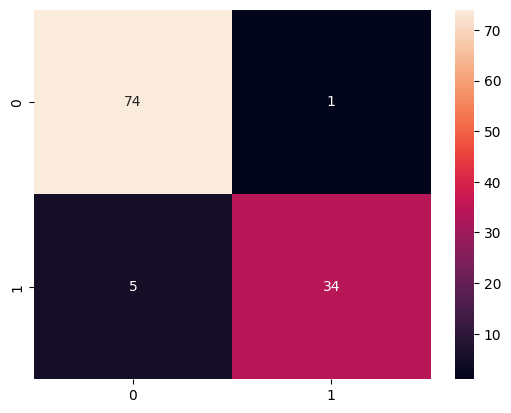

In [90]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True)

In [96]:
#here trying to find the best knn values for best accuracy
score = []
for i in range(1 , 21):
    knn  = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test , y_pred))

print(score)

[0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193]


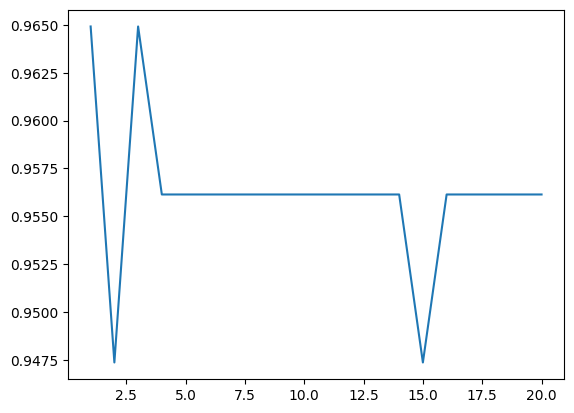

In [98]:
plt.plot(range(1,21) , score)